## 6.排名索引 
    1) 排名排序
    Series的sort_index(ascending=True)方法可以对 index 进行排序操作，ascending 参数用于控制升序或降序，默认为升序。
    在 DataFrame 上，.sort_index(axis=0, by=None, ascending=True) 方法多了一个轴向的选择参数与一个 by 参数，by 参数的作用是针对某一(些)列进行排序(不能对行使用 by 参数)。

In [1]:
from pandas import DataFrame
df0={'Ohio':[0,6,3],'Texas':[7,4,1],'California':[2,8,5]}
df=DataFrame(df0,index=['a','d','c'])
df

,Ohio,Texas,California
a,0,7,2
d,6,4,8
c,3,1,5


In [2]:
df.sort_index(ascending=False)

,Ohio,Texas,California
d,6,4,8
c,3,1,5
a,0,7,2


In [3]:
df.sort_values(by='Ohio')

,Ohio,Texas,California
a,0,7,2
c,3,1,5
d,6,4,8


In [4]:
df.sort_values(by=['California','Texas'])

,Ohio,Texas,California
a,0,7,2
c,3,1,5
d,6,4,8


In [5]:
df.sort_index(axis=1)#按列名升序排

,California,Ohio,Texas
a,2,0,7
d,8,6,4
c,5,3,1


#### 排名(Series.rank(method='average', ascending=True))
    排名的作用与排序的不同之处在于，
    它会把对象的 values 替换成名次(从 1 到 n)，对于平级项可以通过方法里的 method 参数来处理，
    method 参数有四个可选项：average, min, max, first。举例如下：

In [6]:
import pandas as pd
ser=pd.Series([3,2,0,3],index=list('abcd'))
ser.rank()

a    3.5
b    2.0
c    1.0
d    3.5
dtype: float64

In [7]:
ser.rank(method='min')

a    3.0
b    2.0
c    1.0
d    3.0
dtype: float64

In [8]:
ser.rank(method='max')

a    4.0
b    2.0
c    1.0
d    4.0
dtype: float64

In [9]:
ser.rank(method='first')

a    3.0
b    2.0
c    1.0
d    4.0
dtype: float64

#### 注意：在 ser[0]和ser[3] 这对平级项上，不同 method 参数表现出的不同名次。
#### DataFrame 的 .rank(axis=0, method='average', ascending=True) 方法多了axis 参数，可选择按行或列分别进行排名 

In [10]:
import pandas as pd
df=pd.DataFrame({'a':[1,2,2,0],'c':['A','E','B','C'],'d':['a','c','d','c'],'b':[1,3,2,5]},index=[1,3,2,4])
df

,a,c,d,b
1,1,A,a,1
3,2,E,c,3
2,2,B,d,2
4,0,C,c,5


In [11]:
df.sort_index()

,a,c,d,b
1,1,A,a,1
2,2,B,d,2
3,2,E,c,3
4,0,C,c,5


In [12]:
df.sort_index(axis=1)

,a,b,c,d
1,1,1,A,a
3,2,3,E,c
2,2,2,B,d
4,0,5,C,c


In [13]:
df.sort_values('a')

,a,c,d,b
4,0,C,c,5
1,1,A,a,1
3,2,E,c,3
2,2,B,d,2


In [14]:
df.sort_values(['a','b'])

,a,c,d,b
4,0,C,c,5
1,1,A,a,1
2,2,B,d,2
3,2,E,c,3


     2)reindex重新索引
    Series 对象的重新索引通过其 .reindex(index=None,**kwargs) 方法实现。**kwargs 中常用的参数有两个：method=None和fill_value=np.NaN。

In [15]:
from pandas import Series
ser = Series([4.5,7.2,-5.3,3.6],index=['d','b','a','c'])
ser

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [16]:
A = ['a','b','c','d','e','f']
ser.reindex(A)

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
f    NaN
dtype: float64

In [17]:
ser = ser.reindex(A,fill_value=1)
ser

a   -5.3
b    7.2
c    3.6
d    4.5
e    1.0
f    1.0
dtype: float64

In [18]:
A = ['a','c','e','f']
ser=ser.reindex(A)  
ser

a   -5.3
c    3.6
e    1.0
f    1.0
dtype: float64

In [19]:
A = ['a','b','c','d','e','f']
ser=ser.reindex(A,method='ffill')    
ser

a   -5.3
b   -5.3
c    3.6
d    3.6
e    1.0
f    1.0
dtype: float64

In [20]:
A = ['a','b','c','d','e','f','g']
ser.reindex(A,fill_value=0)


a   -5.3
b   -5.3
c    3.6
d    3.6
e    1.0
f    1.0
g    0.0
dtype: float64

In [21]:
obj3 = Series(['blue', 'yellow','purple',], index=['a', 'c', 'd']) #这里的index必须单调
A=list(('a','b','c','d','e'))
obj3.reindex(A, method='ffill')


a      blue
b      blue
c    yellow
d    purple
e    purple
dtype: object

### 总结：.reindex() 方法会返回一个新对象，其 index 严格遵循给出的参数，method:{'backfill', 'bfill', 'pad', 'ffill', None} 参数用于指定插值(填充)方式，当没有给出时，默认用 fill_value 填充，值为 NaN(ffill = pad，bfill = back fill，分别指插值时向前还是向后取值)。
### DataFrame 对象的重新索引方法：.reindex(index=None,columns=None,**kwargs) 
### 仅比 Series 多了一个可选的 columns 参数，用于给列索引。用法与上例Series类似。

In [22]:
from pandas import DataFrame
df0={'Ohio':[0,6,3],'Texas':[7,4,1],'California':[2,8,5]}
df=DataFrame(df0,index=['a','d','c'])
df

,Ohio,Texas,California
a,0,7,2
d,6,4,8
c,3,1,5


In [23]:
df_na=df.reindex(index=['a','c','b','d'])
df_na

,Ohio,Texas,California
a,0.0,7.0,2.0
c,3.0,1.0,5.0
b,NaN,NaN,NaN
d,6.0,4.0,8.0


In [24]:
df_na.fillna(method='ffill',axis=0)

,Ohio,Texas,California
a,0.0,7.0,2.0
c,3.0,1.0,5.0
b,3.0,1.0,5.0
d,6.0,4.0,8.0


In [25]:
states = ['Texas','Utah','California']
df1=df.reindex(columns=states)
df1

,Texas,Utah,California
a,7,NaN,2
d,4,NaN,8
c,1,NaN,5


In [26]:
df1.fillna(method='ffill',axis=1)

,Texas,Utah,California
a,7.0,7.0,2.0
d,4.0,4.0,8.0
c,1.0,1.0,5.0


In [27]:
df2=df.reindex(index=['a','b','c','d'],columns=states,fill_value=1)   #'b'行全为1,Utah列全为1
df2

,Texas,Utah,California
a,7,1,2
b,1,1,1
c,1,1,5
d,4,1,8


#### 3)set_index:重置索引 
    DataFrame.set_index(keys,
                                  drop=True,
                                  append=False,
                                  inplace=False)
                             

In [28]:
df=DataFrame({'a':[1,2,3],'b':['a','b','c'],'c':['A','B','C']})
df

,a,b,c
0,1,a,A
1,2,b,B
2,3,c,C


In [29]:
#复合索引
df1=df.set_index(['b','c'],
                drop=False,
                append=True,
                inplace=False)

In [30]:
df1

,,,a,b,c
,b,c,,,
0,a,A,1,a,A
1,b,B,2,b,B
2,c,C,3,c,C


In [31]:
#复合索引
df2=df.set_index(['b','c'],
                drop=True,
                append=False,
                inplace=False)
df2

,,a
b,c,
a,A,1
b,B,2
c,C,3


#### 4) reset_index :索引还原
        reset_index是set_index的“逆运算”

In [32]:
df1.reset_index(level=None,drop=True,col_level=0,col_fill='')

,a,b,c
0,1,a,A
1,2,b,B
2,3,c,C


In [33]:
df2.reset_index(level=None,drop=False,col_level=0,col_fill='')

,b,c,a
0,a,A,1
1,b,B,2
2,c,C,3


## 7.  数据合并 
     1) 记录合并：是指两个结构相同的数据框合并成一个数据框。也就是在一个数据框中追加另一个数据框的数据记录。
    concat([dataFrame1, dataFrame2,…])
              DataFrame1：数据框
    返回值：DataFrame

In [34]:
import pandas as pd
df1 = pd.read_excel('data/rz2.xlsx')
df1

,YHM,TCSJ,YWXT,IP,DLSJ
0,S1402048,1.892225e+10,1.225790e+17,221.205.98.55,2014-11-04 08:44:46
1,S1411023,1.352226e+10,1.225790e+17,183.184.226.205,2014-11-04 08:45:06
2,S1402048,1.342226e+10,NaN,221.205.98.55,2014-11-04 08:46:39
3,20031509,1.882226e+10,NaN,222.31.51.200,2014-11-04 08:47:41
4,S1405010,1.892225e+10,1.225790e+17,120.207.64.3,2014-11-04 08:49:03
5,20140007,NaN,1.225790e+17,222.31.51.200,2014-11-04 08:50:06
6,S1404095,1.382225e+10,1.225790e+17,222.31.59.220,2014-11-04 08:50:02
7,S1402048,1.332225e+10,1.225790e+17,221.205.98.55,2014-11-04 08:49:18
8,S1405011,1.892226e+10,1.225790e+17,183.184.230.38,2014-11-04 08:14:55
9,S1402048,1.332225e+10,1.225790e+17,221.205.98.55,2014-11-04 08:49:18


In [35]:
df2 =pd.read_excel('data/rz3.xlsx')
df2

,YHM,TCSJ,YWXT,IP,DLSJ
0,S1402011,18603514812,1.225790e+17,221.205.98.55,2014-11-04 08:44:46
1,S1411022,13103515003,1.225790e+17,183.184.226.205,2014-11-04 08:45:06
2,S1402033,13203559930,NaN,221.205.98.55,2014-11-04 08:46:39


In [36]:
df=pd.concat([df1,df2])
df

,YHM,TCSJ,YWXT,IP,DLSJ
0,S1402048,1.892225e+10,1.225790e+17,221.205.98.55,2014-11-04 08:44:46
1,S1411023,1.352226e+10,1.225790e+17,183.184.226.205,2014-11-04 08:45:06
2,S1402048,1.342226e+10,NaN,221.205.98.55,2014-11-04 08:46:39
3,20031509,1.882226e+10,NaN,222.31.51.200,2014-11-04 08:47:41
4,S1405010,1.892225e+10,1.225790e+17,120.207.64.3,2014-11-04 08:49:03
5,20140007,NaN,1.225790e+17,222.31.51.200,2014-11-04 08:50:06
6,S1404095,1.382225e+10,1.225790e+17,222.31.59.220,2014-11-04 08:50:02
7,S1402048,1.332225e+10,1.225790e+17,221.205.98.55,2014-11-04 08:49:18
8,S1405011,1.892226e+10,1.225790e+17,183.184.230.38,2014-11-04 08:14:55
9,S1402048,1.332225e+10,1.225790e+17,221.205.98.55,2014-11-04 08:49:18


#### 2) 字段合并：是指将同一个数据框中的不同的列进行合并，形成新的列。
    X = x1+x2+…
              x1：数据列1
              x2：数据列2
    返回值：Series，合并后的系列，要求合并的系列长度一致。 

In [37]:
df = pd.read_csv('data/rz4.csv',sep=" ",names=['band','area','num'])
df 

,band,area,num
0,189,2225,4812
1,135,2225,5003
2,134,2225,9938
3,188,2225,6753
4,189,2225,3721
5,134,2225,9313
6,138,2225,4373
7,133,2225,2452
8,189,2225,7681


In [38]:
df = df.astype(str)
tel=df['band']+df['area']+df['num']
tel

0    18922254812
1    13522255003
2    13422259938
3    18822256753
4    18922253721
5    13422259313
6    13822254373
7    13322252452
8    18922257681
dtype: object

#### 3) 字段匹配：是指不同结构的数据框(两个或以上的数据框)，按照一定的条件进行合并，即追加列。
    merge(x,y,left_on,right_on) 
               x：第一个数据框
               y：第二个数据框
               left_on：第一个数据框的用于匹配的列
               right_on：第二个数据框的用于匹配的列
         返回值：DataFrame

In [39]:
df1 = pd.read_excel('data/rz2.xlsx',sheet_name='Sheet3')
df1

,id,band,num
0,1,130,123
1,2,131,124
2,4,133,125
3,5,134,126


In [40]:
df2 = pd.read_excel('data/rz2.xlsx',sheet_name='Sheet4')
df2

,id,band,area
0,1,130,351
1,2,131,352
2,3,132,353
3,4,133,354
4,5,134,355
5,5,135,356


In [41]:
pd.merge(df1,df2,left_on='id',right_on='id')

,id,band_x,num,band_y,area
0,1,130,123,130,351
1,2,131,124,131,352
2,4,133,125,133,354
3,5,134,126,134,355
4,5,134,126,135,356


## 8.  数据计算 
    1) 简单计算：通过对各字段进行加、减、乘、除等四则算术运算，计算出的结果作为新的字段，如下表4-4所示。
    表4-4 字段之间的运算结果作为新的字段
 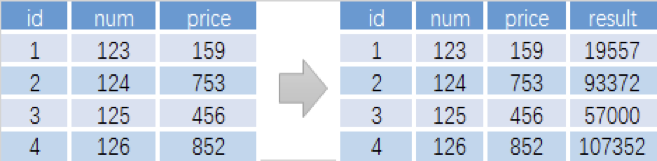

In [42]:
df = pd.read_csv('data/rz2.csv',sep=',')
df

,id,band,num,price
0,1,130,123,159
1,2,131,124,753
2,3,132,125,456
3,4,133,126,852


In [43]:
result=df.price*df.num
result

0     19557
1     93372
2     57000
3    107352
dtype: int64

In [44]:
df['result']=result
df

,id,band,num,price,result
0,1,130,123,159,19557
1,2,131,124,753,93372
2,3,132,125,456,57000
3,4,133,126,852,107352


    2) 数据标准化：是指将数据按照比例缩放，使之落入特定的区间，一般使用0-1标准化。
    X*=(x-min)/(max-min)

In [45]:
df = pd.read_csv('data/rz2.csv',sep=',')
df

,id,band,num,price
0,1,130,123,159
1,2,131,124,753
2,3,132,125,456
3,4,133,126,852


In [46]:
scale=(df.price-df.price.min())/(df.price.max()-df.price.min())
scale

0    0.000000
1    0.857143
2    0.428571
3    1.000000
Name: price, dtype: float64

## 9  数据分组
    数据分组：根据数据分析对象的特征，按照一定的数据指标，把数据划分为不同的区间来进行研究，以揭示其内在的联系和规律性。简单来说：就是新增一列，将原来的数据按照其性质归入新的类别中。
    cut(series,bins,right=True,labels=NULL)
            series    需要分组的数据
            bins     分组的依据数据
            right     分组的时候右边是否闭合
            labels    分组的自定义标签，可以不自定义
    现有数据如下表，将数据进行分组。
    序号	品牌	数据	价格		序号	品牌	数据	价格	类别
1	130	123	159		1	130	123	159	500以下
2	131	124	753		2	131	124	753	 500以上
3	132	125	456		3	132	125	456	500以下
4	133	126	852		4	133	126	852	 500以上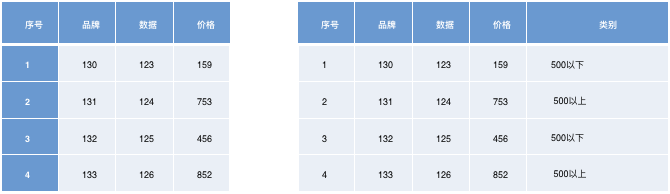

In [47]:
df =pd.read_csv('data/rz2.csv',sep=',')
df

,id,band,num,price
0,1,130,123,159
1,2,131,124,753
2,3,132,125,456
3,4,133,126,852


In [48]:
bins=[min(df.price)-1,500,max(df.price)+1]
labels=["500以下","500以上"]
pd.cut(df.price,bins)

0    (158, 500]
1    (500, 853]
2    (158, 500]
3    (500, 853]
Name: price, dtype: category
Categories (2, interval[int64]): [(158, 500] < (500, 853]]

In [49]:
pd.cut(df.price,bins,right=False)

0    [158, 500)
1    [500, 853)
2    [158, 500)
3    [500, 853)
Name: price, dtype: category
Categories (2, interval[int64]): [[158, 500) < [500, 853)]

In [50]:
pa=pd.cut(df.price,bins,right=False,labels=labels)
pa

0    500以下
1    500以上
2    500以下
3    500以上
Name: price, dtype: category
Categories (2, object): [500以下 < 500以上]

In [51]:
df['label']=pd.cut(df.price,bins,right=False,labels=labels)
df

,id,band,num,price,label
0,1,130,123,159,500以下
1,2,131,124,753,500以上
2,3,132,125,456,500以下
3,4,133,126,852,500以上


## 10.  日期处理   
    1) 日期转换：是指将字符型的日期格式转换为日期格式数据的过程。
    to_datetime(dateString,format)
              format格式：
    %Y：年份
    %m：月份
    %d：日期
    %H：小时
    %M：分钟
    %S：秒
 

In [52]:
import pandas as pd
df = pd.read_csv('data/rz3.csv',sep=',',encoding='utf8')
df

,num,price,year,month,date
0,123,159,2016,1,2016/6/1
1,124,753,2016,2,2016/6/2
2,125,456,2016,3,2016/6/3
3,126,852,2016,4,2016/6/4
4,127,210,2016,5,2016/6/5
5,115,299,2016,6,2016/6/6
6,102,699,2016,7,2016/6/7
7,201,599,2016,8,2016/6/8
8,154,199,2016,9,2016/6/9
9,142,899,2016,10,2016/6/10


In [53]:
df_dt = pd.to_datetime(df.date,format="%Y/%m/%d")
df_dt

0   2016-06-01
1   2016-06-02
2   2016-06-03
3   2016-06-04
4   2016-06-05
5   2016-06-06
6   2016-06-07
7   2016-06-08
8   2016-06-09
9   2016-06-10
Name: date, dtype: datetime64[ns]

    2) 日期格式化：是指将日期型的数据按照给定的格式转化为字符型的数据。
    apply(lambda x:处理逻辑)
    datetime.strftime(x,format)

In [54]:
from datetime import datetime
df_dt_str=df_dt.apply(lambda x: datetime.strftime(x,"%Y/%m/%d"))   #apply见后注
df_dt_str

0    2016/06/01
1    2016/06/02
2    2016/06/03
3    2016/06/04
4    2016/06/05
5    2016/06/06
6    2016/06/07
7    2016/06/08
8    2016/06/09
9    2016/06/10
Name: date, dtype: object

## 注意：当希望将函数f应用到DataFrame 对象的行或列时，可以使用.apply(f, axis=0, args=(), **kwds) 方法，axis=0表示按列运算，axis=1时表示按行运算。如：

In [55]:
df=pd.DataFrame({'ohio':[1,3,6],'texas':[1,4,5],
             'california':[2,5,8]},index=['a','c','d'])
df

,ohio,texas,california
a,1,1,2
c,3,4,5
d,6,5,8


In [56]:
f = lambda x:x.max()-x.min()
df.apply(f)  #默认按列运算，同df.apply(f,axis=0)

ohio          5
texas         4
california    6
dtype: int64

In [57]:
df.apply(f,axis=1)  #按行运算

a    1
c    2
d    3
dtype: int64

    3) 日期抽取：是指从日期格式里面抽取出需要的部分属性
    Data_dt.dt.property
    second     1-60秒，从1开始到60
    minute     1-60分，从1开始到60
    hour       1-24小时，从1开始到24
    day        1-31日，一个月中第几天，从1开始到31
    month      1-12月，从1开始到12
    year        年份
    weekday    1-7，一周中的第几天，从1开始，最大为7

In [58]:
df = pd.read_csv('data/rz3.csv',sep=',',encoding='utf8')
df

,num,price,year,month,date
0,123,159,2016,1,2016/6/1
1,124,753,2016,2,2016/6/2
2,125,456,2016,3,2016/6/3
3,126,852,2016,4,2016/6/4
4,127,210,2016,5,2016/6/5
5,115,299,2016,6,2016/6/6
6,102,699,2016,7,2016/6/7
7,201,599,2016,8,2016/6/8
8,154,199,2016,9,2016/6/9
9,142,899,2016,10,2016/6/10


In [59]:
df_dt =pd.to_datetime(df.date,format='%Y/%m/%d')
df_dt

0   2016-06-01
1   2016-06-02
2   2016-06-03
3   2016-06-04
4   2016-06-05
5   2016-06-06
6   2016-06-07
7   2016-06-08
8   2016-06-09
9   2016-06-10
Name: date, dtype: datetime64[ns]

In [60]:
df_dt.dt.year

0    2016
1    2016
2    2016
3    2016
4    2016
5    2016
6    2016
7    2016
8    2016
9    2016
Name: date, dtype: int64

In [61]:
df_dt.dt.month

0    6
1    6
2    6
3    6
4    6
5    6
6    6
7    6
8    6
9    6
Name: date, dtype: int64

In [62]:
df_dt.dt.day

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: date, dtype: int64